In [99]:
!pip install xgboost
!pip install --upgrade xgboost
!pip install eli5
!pip install shap
!pip install lime
!pip install dalex
!pip install category_encoders
!pip install shapash
!pip install pdpbox

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.1.1-cp310-cp310-linux_x86_64.whl
  Attempting uninstall: matplotlib
    Found exi

In [100]:
!pip install --upgrade pip setuptools
!pip install --upgrade matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.7.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.6 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.1
    Uninstalling matplotlib-3.1.1:
      Successfully uninstalled matplotlib-3.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pdpbox 0.2.1 requires matplotlib==3.1.1, but you have matplotlib 3.7.1 which is incompatible.


**Importing the libraries**

In [101]:
from xgboost import XGBClassifier
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
from sklearn.metrics import accuracy_score
import shap
import lime
import time 
import shapash
import seaborn as sns
from category_encoders import OrdinalEncoder
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
#import datatable as dt 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import eli5
from eli5.sklearn import PermutationImportance
from shapash.utils.load_smartpredictor import load_smartpredictor
from shapash.explainer.smart_explainer import SmartExplainer
from pdpbox import pdp, get_dataset, info_plots

**Dataset description**

In [102]:
col_names = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved','exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']
heart = pd.read_csv("heart.csv", header=0, names=col_names)
print(heart.head())

   age  sex  chest_pain_type  resting_blood_pressure  cholesterol  \
0   52    1                0                     125          212   
1   53    1                0                     140          203   
2   70    1                0                     145          174   
3   61    1                0                     148          203   
4   62    0                0                     138          294   

   fasting_blood_sugar  rest_ecg  max_heart_rate_achieved  \
0                    0         1                      168   
1                    1         0                      155   
2                    0         1                      125   
3                    0         1                      161   
4                    1         1                      106   

   exercise_induced_angina  st_depression  st_slope  num_major_vessels  \
0                        0            1.0         2                  2   
1                        1            3.1         0                  0

In [103]:
print(heart.groupby('target').count())
print(heart.info())

feature_cols = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved','exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia']
X = heart[feature_cols]
y = heart.target

        age  sex  chest_pain_type  resting_blood_pressure  cholesterol  \
target                                                                   
0       499  499              499                     499          499   
1       526  526              526                     526          526   

        fasting_blood_sugar  rest_ecg  max_heart_rate_achieved  \
target                                                           
0                       499       499                      499   
1                       526       526                      526   

        exercise_induced_angina  st_depression  st_slope  num_major_vessels  \
target                                                                        
0                           499            499       499                499   
1                           526            526       526                526   

        thalassemia  
target               
0               499  
1               526  
<class 'pandas.core.frame.DataFra

**Splitting the dataset into train and test set**

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print('train size is %i'%y_train.shape[0])
print('test size is %i'%y_test.shape[0])

train size is 717
test size is 308


**XGBoost Classification framework**

In [105]:
xgbm = XGBClassifier(max_depth = 7 , learning_rate = 0.25 , objective = 'binary:logistic' , n_estimators= 5, random_state=42)
xgbm.fit(X_train , y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.25, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=5, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [106]:
xgbm.score(X_train , y_train)

0.99581589958159

In [107]:
xgbm.score(X_test , y_test)

0.9772727272727273

**Visualization of important features for heart disease classification**

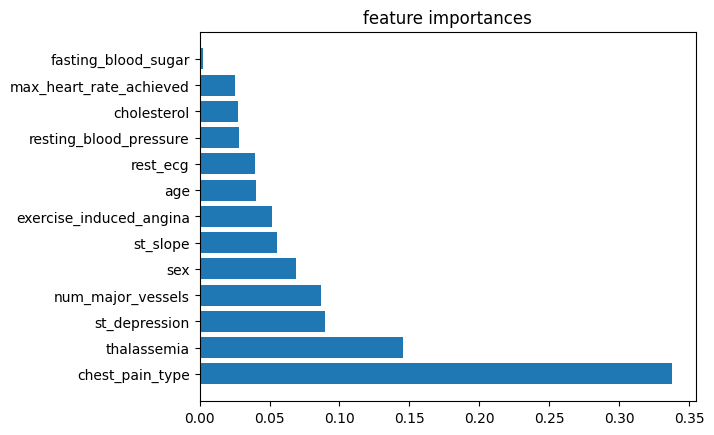

In [108]:
from matplotlib import pyplot as plt

def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances')
    plt.show()
features_names = list(heart.columns)
f_importances(abs(xgbm.feature_importances_), features_names, top=13)

**Accuracy of XGBoost classification for prediction of heart disease** 

In [109]:
y_pred = xgbm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 97.73%


**Performance Metrices for heart disease classification using XGBoost technique** 

In [110]:
report=metrics.classification_report(y_test,y_pred)
clf_name_rf=['Random Forest Heart Disease','RegLog']
print('Reporting for %s:'%clf_name_rf)
print(report)

Reporting for ['Random Forest Heart Disease', 'RegLog']:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       161
           1       0.99      0.97      0.98       147

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308



**AUC-ROC Curve**

0.9767820171546879


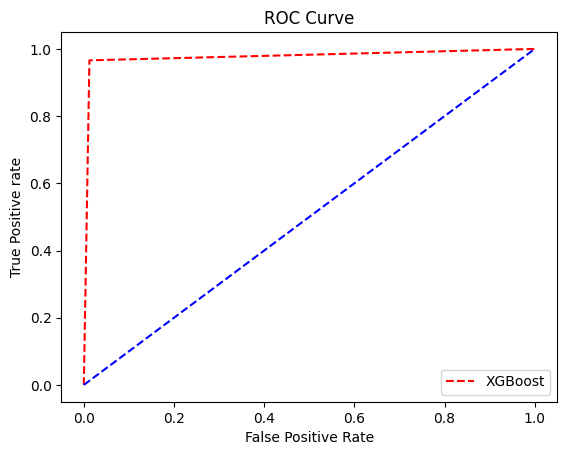

In [111]:
fpr, tpr, thresh = roc_curve(y_test, y_pred[:], pos_label=1)

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

auc_score = roc_auc_score(y_test, y_pred[:])
print(auc_score)

plt.plot(fpr, tpr, linestyle= '--', color='red', label='XGBoost')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

**Confusion Matrix for heart disease classification using XGBoost Technique**

[[159   2]
 [  5 142]]


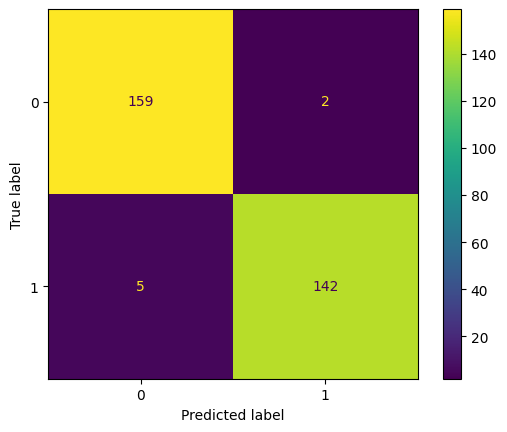

In [112]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

**Explainable AI Technique: eli5**

In [113]:
perm = PermutationImportance(xgbm, random_state=1).fit(X_test, y_test)
eli5.explain_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.1591 ± 0.0282,chest_pain_type
0.1500 ± 0.0264,st_depression
0.1071 ± 0.0260,num_major_vessels
0.0903 ± 0.0150,thalassemia
0.0864 ± 0.0151,age
0.0714 ± 0.0197,st_slope
0.0584 ± 0.0092,cholesterol
0.0545 ± 0.0258,sex
0.0364 ± 0.0119,max_heart_rate_achieved
0.0214 ± 0.0120,resting_blood_pressure


In [114]:
eli5.explain_weights(xgbm)

Weight,Feature
0.3377,chest_pain_type
0.1454,thalassemia
0.0898,st_depression
0.0867,num_major_vessels
0.0687,sex
0.0550,st_slope
0.0517,exercise_induced_angina
0.0405,age
0.0400,rest_ecg
0.0285,resting_blood_pressure


In [115]:
eli5.show_prediction(xgbm, X_test.iloc[20], feature_names=list(X.columns), show_feature_values=True)

**Explainable AI Technique: SHapley Additive exPlanation (SHAP)**

In [116]:
explainer = shap.TreeExplainer(xgbm)
shap_values = explainer.shap_values(X_test)

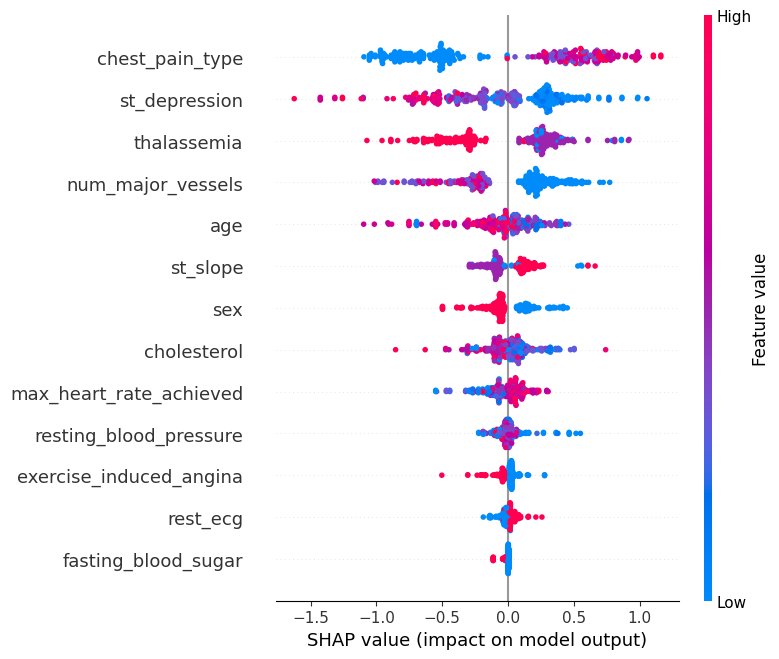

In [117]:
shap.summary_plot(shap_values, X_test)

In [118]:
X_test = np.array(X_test)
#print(type(X_test))
#print(X_test)
df_X_test = pd.DataFrame(X_test, columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved','exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia'])

In [119]:
explainer = shap.TreeExplainer(xgbm)
shap_values = explainer.shap_values(df_X_test)

**SHAP-Dependence Plot**

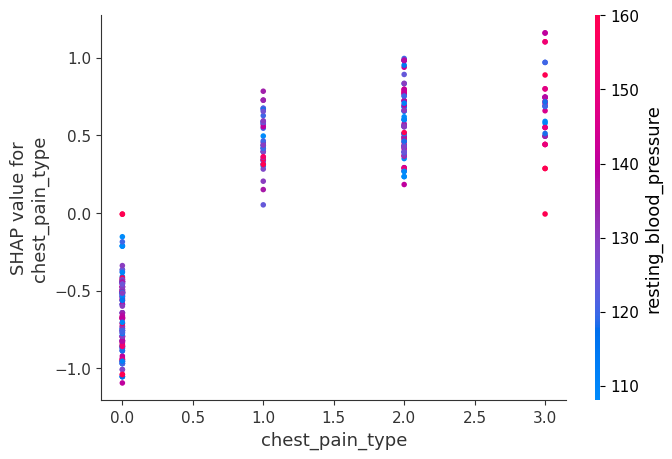

In [120]:
shap.dependence_plot(2, shap_values, df_X_test, feature_names=df_X_test.columns)

**SHAP-Waterfall Plot**

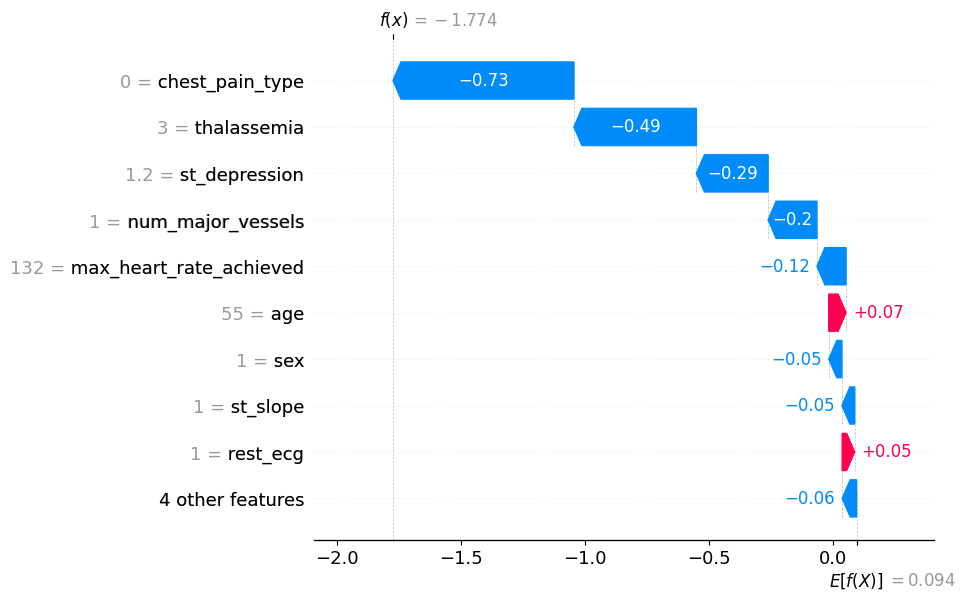

In [121]:
row = 120
shap.waterfall_plot(shap.Explanation(values=shap_values[row], 
                                     base_values=explainer.expected_value, data=df_X_test.iloc[row],  
                                     feature_names=df_X_test.columns.tolist()))

**Explainable AI technique: Local  Interpretable Model-agnostic Explanation(LIME)**

In [122]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns, class_names=['False', 'True'], discretize_continuous=False)

idx = np.random.randint(X_test.shape[0])
exp = explainer.explain_instance(df_X_test.iloc[idx].values, xgbm.predict_proba, num_features=13)

exp.show_in_notebook(show_table=True)

**Explainable AI technique: DALEX**

In [123]:
import xgboost as xgb
import dalex as dx
explainer = dx.Explainer(xgbm,X,y)

Preparation of a new explainer is initiated

  -> data              : 1025 rows 13 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 1025 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x7f4c133ceb90> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.14, mean = 0.509, max = 0.862
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.646, mean = 0.00409, max = 0.619
  -> model_info        : package xgboost

A new explainer has been created!


In [124]:
explainer.model_parts().plot(max_vars=13)

In [125]:
explainer.model_performance(model_type='classification').plot(geom='roc')

In [126]:
explainer.predict_parts(X.iloc[12, :]).plot(max_vars=13)

In [127]:
explainer.predict_parts(X.iloc[12, :],type="shap").plot(min_max=[0,1],max_vars=13)

In [128]:
explainer.predict_parts(X.iloc[12, :], type='break_down_interactions').plot(max_vars=20)

In [129]:
explainer.model_performance(model_type = 'classification').plot()

In [130]:
explainer.model_profile(type = 'partial', label="pdp").plot()

Calculating ceteris paribus: 100%|██████████| 13/13 [00:00<00:00, 51.11it/s]


In [131]:
explainer.model_profile(type = 'ale', label="pdp").plot()

Calculating accumulated dependency: 100%|██████████| 13/13 [00:02<00:00,  6.26it/s]


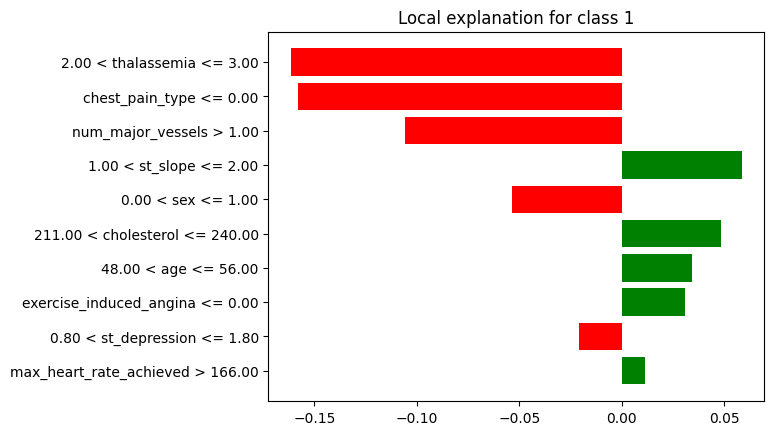

In [132]:
explainer.predict_surrogate(X.iloc[[0]]).plot()

**Explainable AI technique: SHAPASH**

In [133]:
domain_features_dict = {
    'age':'age', 'sex':'sex', 'cpt':'chest_pain_type',
     'rbp':'resting_blood_pressure', 'ch':'cholesterol', 'fbs':'fasting_blood_sugar', 're':'rest_ecg',
     'mhra':'max_heart_rate_achieved','eia':'exercise_induced_angina', 'dep':'st_depression', 'sl':'st_slope', 'nmv':'num_major_vessels', 'thal':'thalassemia'  
}

xpl = SmartExplainer(model=xgbm, features_dict=domain_features_dict)
xpl.compile(
    x=df_X_test)

In [134]:
app = xpl.run_app(title_story='Heart Diease Explanation')

Dash is running on http://0.0.0.0:8050/



INFO:dash.dash:Dash is running on http://0.0.0.0:8050/



In [135]:
xpl.plot.features_importance()

 * Serving Flask app 'shapash.webapp.smart_app'
 * Debug mode: off


Address already in use
Port 8050 is in use by another program. Either identify and stop that program, or start the server with a different port.


In [136]:
xpl.plot.contribution_plot('chest_pain_type')
#xpl.plot.local_plot(index=79)

In [137]:
xpl.plot.contribution_plot('st_depression')

In [138]:
xpl.plot.contribution_plot('thalassemia')

In [139]:
xpl.plot.contribution_plot('num_major_vessels')

In [140]:
xpl.plot.contribution_plot('age')

In [141]:
xpl.plot.contribution_plot('st_slope')

In [142]:
xpl.plot.contribution_plot('sex')

In [143]:
xpl.plot.contribution_plot('cholesterol')

In [144]:
xpl.plot.contribution_plot('max_heart_rate_achieved')

In [145]:
xpl.plot.contribution_plot('resting_blood_pressure')

In [146]:
xpl.plot.contribution_plot('exercise_induced_angina')

In [147]:
xpl.plot.contribution_plot('rest_ecg')

In [148]:
xpl.plot.contribution_plot('fasting_blood_sugar')

In [149]:
xpl.plot.top_interactions_plot(nb_top_interactions=10)

**Explainable AI technique: Partial Dependency Plot (PDP)**

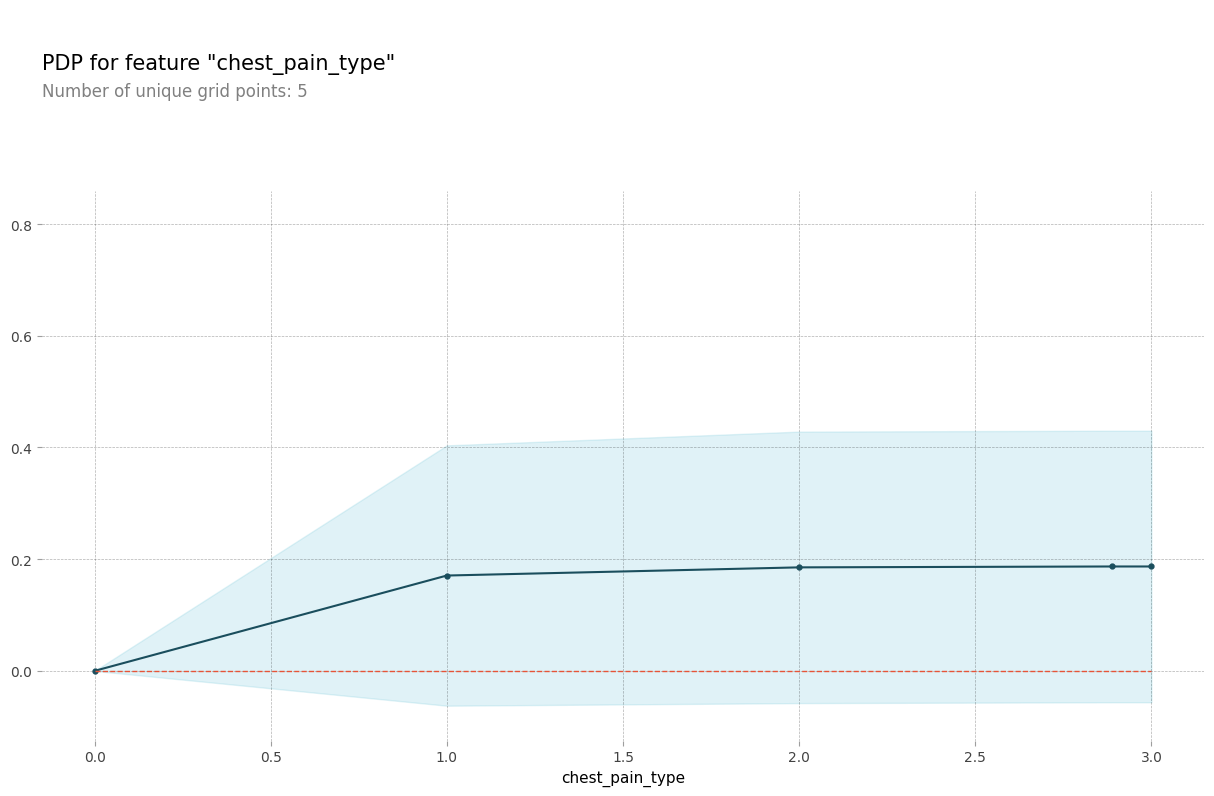

In [150]:
feature_name = 'chest_pain_type'
pdp_feature = pdp.pdp_isolate(model=xgbm, dataset=df_X_test, model_features=df_X_test.columns, feature=feature_name)
fig, axes = pdp.pdp_plot(pdp_feature, feature_name)

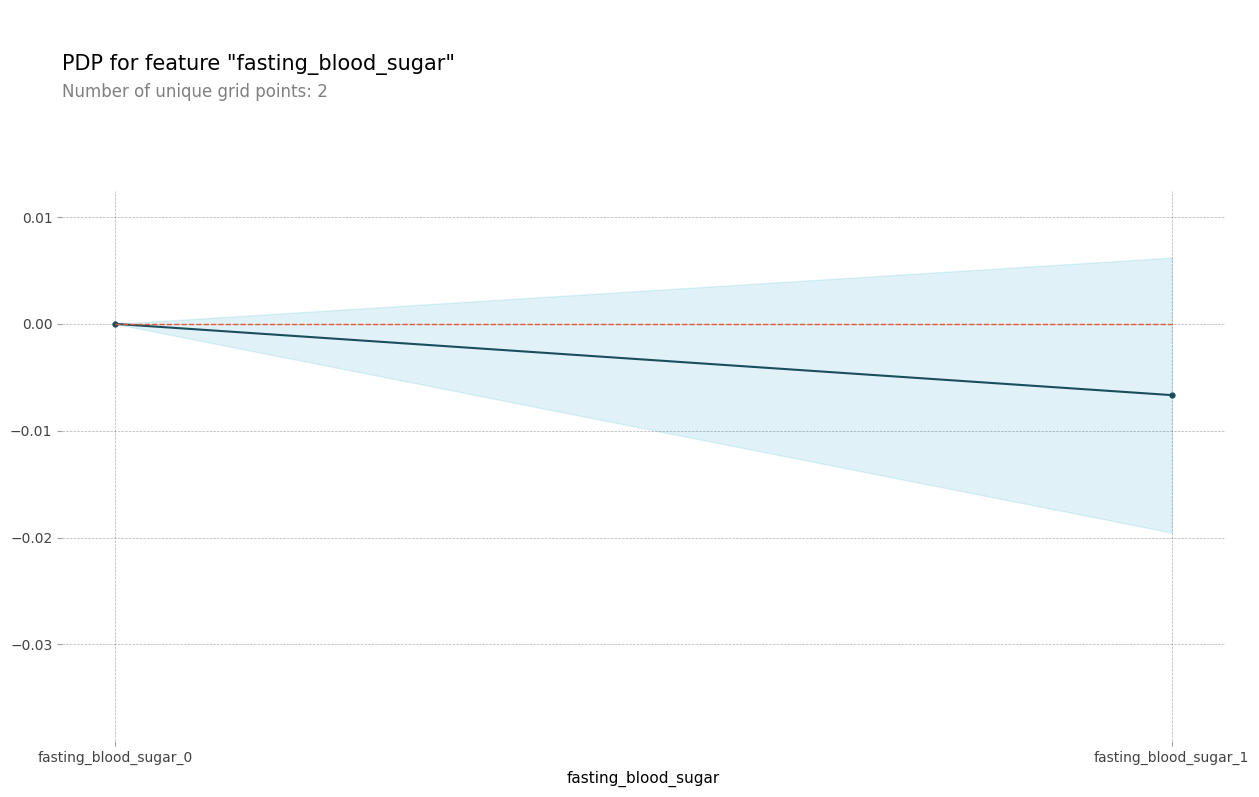

In [151]:
feature_name = 'fasting_blood_sugar'
pdp_feature = pdp.pdp_isolate(model=xgbm, dataset=df_X_test, model_features=df_X_test.columns, feature=feature_name)
fig, axes = pdp.pdp_plot(pdp_feature, feature_name)